In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
# Load dataset
df = pd.read_csv("customer_churn_analysis.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
#Rename columns
df.rename(columns={'customerID' : 'Customer ID', 'gender' : 'Gender', 'SeniorCitizen' : 'Senior Citizen', 'Partner' : 'Partner', 'Dependents' : 'Dependents',
       'tenure' : 'Tenure', 'PhoneService' : 'Phone Service', 'MultipleLines' : 'Multiple Lines', 'InternetService' : 'Internet Service',
       'OnlineSecurity' : 'Online Security', 'OnlineBackup' : 'Online Backup', 'DeviceProtection' : 'Device Protection', 'TechSupport' : 'Tech Support',
       'StreamingTV' : 'Streaming TV', 'StreamingMovies' : 'Streaming Movies', 'Contract' : 'Contract', 'PaperlessBilling' : 'Paperless Billing',
       'PaymentMethod' : 'Payment Method', 'MonthlyCharges' : 'Monthly Charges', 'TotalCharges' : 'Total Charges', 'Churn' : 'Churn'}, inplace=True)
df.head(5)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Drop customer ID
df.drop('Customer ID', axis=1, inplace=True)

In [26]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\604396559.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [27]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\372009398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [28]:
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\3889879425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})


In [30]:
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})

In [31]:
df['Multiple Lines'] = df['Multiple Lines'].replace({'No phone service': 3, 'No': 0, 'Yes': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\2837909609.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Multiple Lines'] = df['Multiple Lines'].replace({'No phone service': 3, 'No': 0, 'Yes': 1})


In [32]:
df['Internet Service'] = df['Internet Service'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\2933397431.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internet Service'] = df['Internet Service'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})


In [33]:
df['Online Backup'] = df['Online Backup'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\1250929445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Online Backup'] = df['Online Backup'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [34]:
df['Device Protection'] = df['Device Protection'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\1771961438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Device Protection'] = df['Device Protection'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [35]:
df['Tech Support'] = df['Tech Support'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\1666432843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tech Support'] = df['Tech Support'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [36]:
df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\669786482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [37]:
df['Phone Service'] = df['Phone Service'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\2074222459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Phone Service'] = df['Phone Service'].replace({'Yes': 1, 'No': 0})


In [38]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 3, 'Two year': 2, 'One year': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\3876928934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({'Month-to-month': 3, 'Two year': 2, 'One year': 1})


In [39]:
df['Streaming TV'] = df['Streaming TV'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\2275693881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Streaming TV'] = df['Streaming TV'].replace({'Yes': 1, 'No internet service': 2, 'No': 0})


In [40]:
df['Paperless Billing'] = df['Paperless Billing'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\1401872351.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Paperless Billing'] = df['Paperless Billing'].replace({'Yes': 1, 'No': 0})


In [41]:
df['Payment Method'] = df['Payment Method'].replace({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19856\2830743483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment Method'] = df['Payment Method'].replace({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})


In [42]:
# Convert to float first (safer, since many monetary values have decimals)
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'], errors='coerce')
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [43]:
df.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1,0,3,1,No,1,0,0,0,0,3,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,Yes,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,Yes,1,0,0,0,0,3,1,2,53.85,108.15,1
3,1,0,0,0,45,0,3,1,Yes,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,No,0,0,0,0,0,3,1,1,70.70,151.65,1


In [44]:
df['Payment Method'].value_counts()

Payment Method
1    2365
2    1612
3    1544
4    1522
Name: count, dtype: int64

In [ ]:
# Convert TotalCharges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)

In [47]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

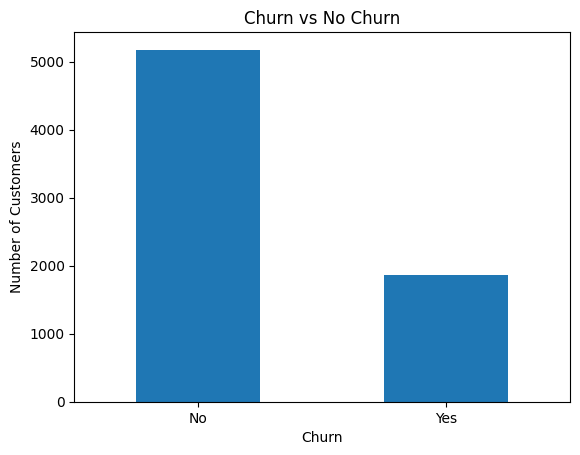

In [48]:
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
plt.title("Churn vs No Churn")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel("Number of Customers")
plt.show()

In [49]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7849538679914834
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1050
           1       0.60      0.47      0.52       359

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.78      1409



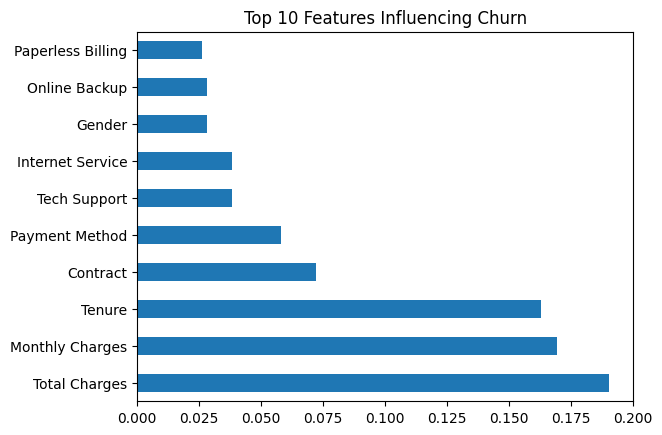

In [50]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.show()